<a href="https://colab.research.google.com/github/jumacaq/sentiment-analyzer/blob/master/Analisis_sentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📊 Proyecto de Análisis de Sentimientos de Tweets

## 🎯 Problema de Negocio

El objetivo de este proyecto es analizar los sentimientos de los tweets, identificando si los mensajes son positivos o negativos. Utilizando un conjunto de datos de 1,600,000 tweets preprocesados, se pretende generar diversas características que se utilizarán para entrenar un modelo de clasificación.

## ❓ Preguntas Clave

- **¿Qué variables pueden ser clave para la detección del sentimiento?**
- **¿Qué tipo de modelos pueden servir para detectar el sentimiento en los tweets?**
- **¿Qué métricas se pueden utilizar para evaluar el desempeño del modelo?**

# **1. Configuración del entorno**

In [ ]:
!pip install emoji

In [ ]:
!pip install vaderSentiment

In [ ]:
!pip install textblob

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import emoji
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
import math
from collections import Counter
from textblob import TextBlob
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import joblib
from sklearn.metrics import roc_curve, precision_recall_curve


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**2. Carga y preprocesamiento de datos**

## 2.1 Cargando los datos

In [ ]:
# Cargar el dataset de tweets
df = pd.read_csv('/content/drive/MyDrive/ bootcamp experience/Machine Learning/febrero_2025/ML_Classification_Tweets/training.1600000.processed.noemoticon.csv', encoding='latin-1')

df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
df.target.value_counts()

,count
target,
4,800000
0,799999


## 2.2 Limpieza del texto

In [ ]:
# Data preprocessing
def preprocess_data(df):
    # Convert date string to datetime object
    df['datetime'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S PDT %Y')

    # Extract date components
    df['date_only'] = df['datetime'].dt.date
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['minute'] = df['datetime'].dt.minute
    df['weekday'] = df['datetime'].dt.day_name()

    return df
preprocess_data(df)

,target,ids,date,flag,user,text,datetime,date_only,year,month,day,hour,minute,weekday
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,2009-04-06,2009,4,6,22,19,Monday
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,2009-04-06,2009,4,6,22,19,Monday
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,2009-04-06,2009,4,6,22,19,Monday
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,2009-04-06,2009,4,6,22,19,Monday
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,2009-04-06 22:20:00,2009-04-06,2009,4,6,22,20,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,2009-06-16 08:40:49,2009-06-16,2009,6,16,8,40,Tuesday
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,2009-06-16 08:40:49,2009-06-16,2009,6,16,8,40,Tuesday
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,2009-06-16 08:40:49,2009-06-16,2009,6,16,8,40,Tuesday
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,2009-06-16 08:40:49,2009-06-16,2009,6,16,8,40,Tuesday


In [ ]:
date_only = df['date_only'].unique()
date_only

array([datetime.date(2009, 4, 6), datetime.date(2009, 4, 7),
       datetime.date(2009, 4, 17), datetime.date(2009, 4, 18),
       datetime.date(2009, 4, 19), datetime.date(2009, 4, 20),
       datetime.date(2009, 4, 21), datetime.date(2009, 5, 1),
       datetime.date(2009, 5, 2), datetime.date(2009, 5, 3),
       datetime.date(2009, 5, 4), datetime.date(2009, 5, 9),
       datetime.date(2009, 5, 10), datetime.date(2009, 5, 11),
       datetime.date(2009, 5, 13), datetime.date(2009, 5, 14),
       datetime.date(2009, 5, 16), datetime.date(2009, 5, 17),
       datetime.date(2009, 5, 18), datetime.date(2009, 5, 21),
       datetime.date(2009, 5, 22), datetime.date(2009, 5, 23),
       datetime.date(2009, 5, 25), datetime.date(2009, 5, 26),
       datetime.date(2009, 5, 27), datetime.date(2009, 5, 28),
       datetime.date(2009, 5, 29), datetime.date(2009, 5, 30),
       datetime.date(2009, 5, 31), datetime.date(2009, 6, 1),
       datetime.date(2009, 6, 2), datetime.date(2009, 6, 3),
  

Date Analysis:
--------------------------------------------------

Top 10 dates with most tweets:
date_only
2009-06-06    111676
2009-06-01    110290
2009-06-15    109781
2009-05-30    103673
2009-06-07     96350
2009-05-31     94588
2009-05-29     73827
2009-06-16     67980
2009-06-02     64192
2009-06-05     58757
dtype: int64

Date Statistics:
Total number of unique dates: 48
Average tweets per day: 33333.31
Maximum tweets in a single day: 111676 (on 2009-06-06)
Minimum tweets in a single day: 169 (on 2009-05-25)


,0
date_only,
2009-06-06,111676
2009-06-01,110290
2009-06-15,109781
2009-05-30,103673
2009-06-07,96350
2009-05-31,94588
2009-05-29,73827
2009-06-16,67980
2009-06-02,64192


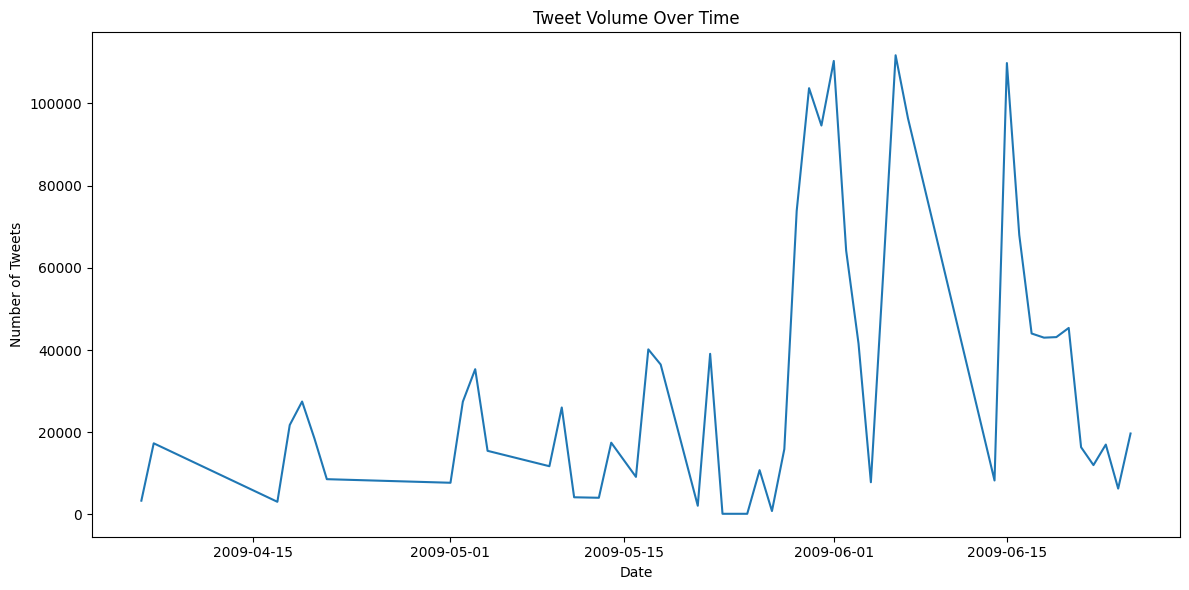

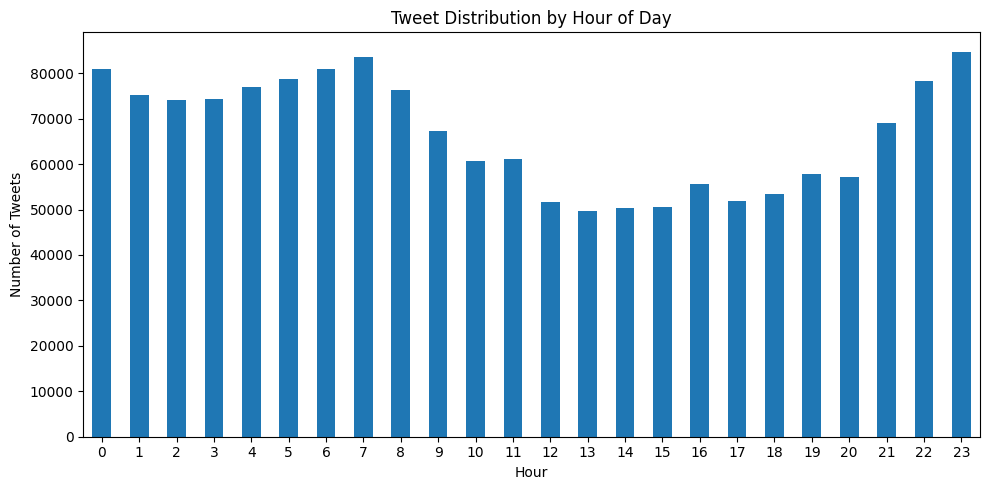

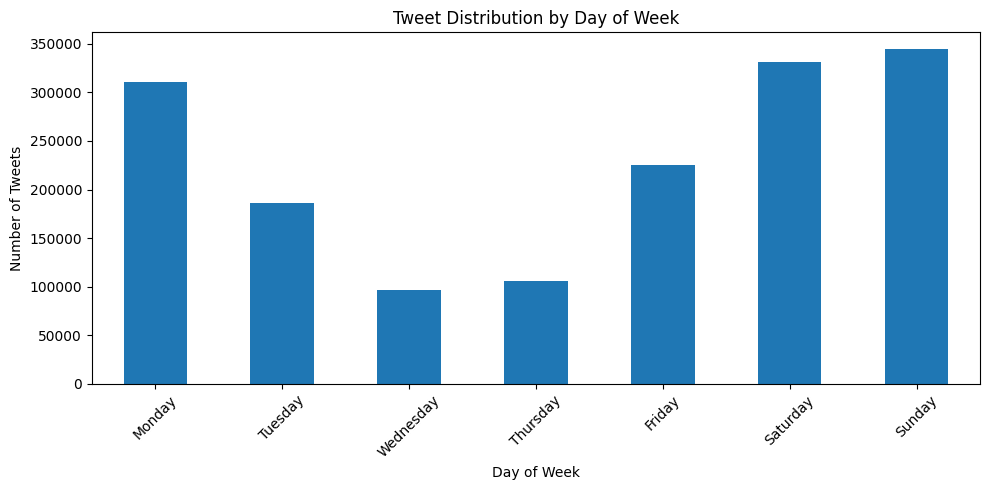

In [ ]:

# Analyze date distribution
def analyze_date_distribution(df):
    print("Date Analysis:")
    print("-" * 50)

    # Count tweets per date
    date_counts = df.groupby('date_only').size().sort_values(ascending=False)
    print(f"\nTop 10 dates with most tweets:")
    print(date_counts.head(10))

    # Calculate statistics
    print(f"\nDate Statistics:")
    print(f"Total number of unique dates: {len(date_counts)}")
    print(f"Average tweets per day: {date_counts.mean():.2f}")
    print(f"Maximum tweets in a single day: {date_counts.max()} (on {date_counts.idxmax()})")
    print(f"Minimum tweets in a single day: {date_counts.min()} (on {date_counts.idxmin()})")
     # Plot daily tweet volume
    plt.figure(figsize=(12, 6))
    date_counts.sort_index().plot(kind='line')
    plt.title('Tweet Volume Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Tweets')
    plt.tight_layout()
    plt.savefig('tweet_volume_over_time.png')

    # Plot distribution by hour
    hour_counts = df.groupby('hour').size()
    plt.figure(figsize=(10, 5))
    hour_counts.plot(kind='bar')
    plt.title('Tweet Distribution by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel('Number of Tweets')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig('tweet_distribution_by_hour.png')

    # Plot distribution by weekday
    weekday_counts = df.groupby('weekday').size()
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_counts = weekday_counts.reindex(weekday_order)
    plt.figure(figsize=(10, 5))
    weekday_counts.plot(kind='bar')
    plt.title('Tweet Distribution by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Number of Tweets')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('tweet_distribution_by_weekday.png')

    return date_counts

analyze_date_distribution(df)


User Activity Analysis:
--------------------------------------------------

Top 20 most active users:
user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
SongoftheOss       227
Jayme1988          225
keza34             219
ramdomthoughts     216
shanajaca          213
wowlew             212
nuttychris         211
TraceyHewins       211
thisgoeshere       207
Spidersamm         205
dtype: int64

User Statistics:
Total number of unique users: 659775
Average tweets per user: 2.43
Maximum tweets by a single user: 549 (by user lost_dog)

Proportion of tweets from top users:
Top 10 users: 0.19%
Top 100 users: 1.06%
Top 1000 users: 4.88%


,0
user,
lost_dog,549
webwoke,345
tweetpet,310
SallytheShizzle,281
VioletsCRUK,279
...,...
artgantuan,1
artfulife,1
artful_Roger,1


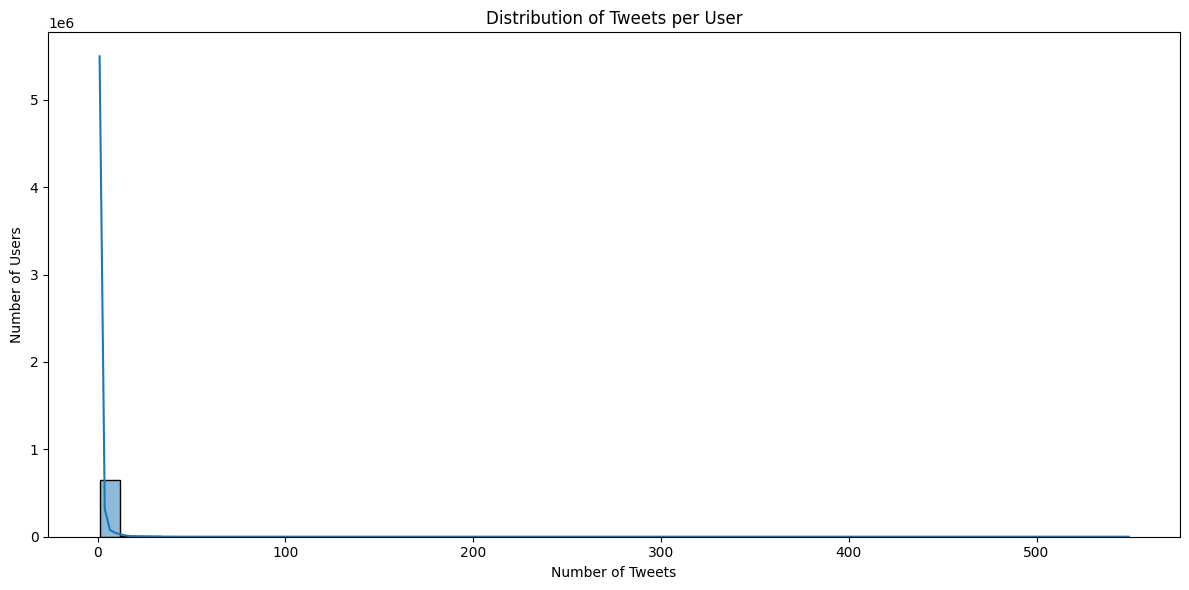

In [ ]:

# Analyze user activity
def analyze_user_activity(df):
    print("\nUser Activity Analysis:")
    print("-" * 50)

    # Count tweets per user
    user_counts = df.groupby('user').size().sort_values(ascending=False)
    print(f"\nTop 20 most active users:")
    print(user_counts.head(20))

    # Calculate statistics
    print(f"\nUser Statistics:")
    print(f"Total number of unique users: {len(user_counts)}")
    print(f"Average tweets per user: {user_counts.mean():.2f}")
    print(f"Maximum tweets by a single user: {user_counts.max()} (by user {user_counts.idxmax()})")

    # Plot user activity distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(user_counts.values, bins=50, kde=True)
    plt.title('Distribution of Tweets per User')
    plt.xlabel('Number of Tweets')
    plt.ylabel('Number of Users')
    plt.tight_layout()
    plt.savefig('tweets_per_user_distribution.png')

    # Calculate proportion of tweets from top users
    top_10_percentage = user_counts.head(10).sum() / user_counts.sum() * 100
    top_100_percentage = user_counts.head(100).sum() / user_counts.sum() * 100
    top_1000_percentage = user_counts.head(1000).sum() / user_counts.sum() * 100

    print(f"\nProportion of tweets from top users:")
    print(f"Top 10 users: {top_10_percentage:.2f}%")
    print(f"Top 100 users: {top_100_percentage:.2f}%")
    print(f"Top 1000 users: {top_1000_percentage:.2f}%")

    return user_counts

analyze_user_activity(df)


Sentiment Analysis Over Time:
--------------------------------------------------

Dates with highest positive sentiment ratio:
target          0      4  ratio_positive
date_only                               
2009-05-17  14289  25865        0.644145
2009-05-22  13947  25127        0.643062
2009-05-18  13358  23111        0.633716
2009-05-21    788   1344        0.630394
2009-05-30  39279  64394        0.621126
2009-05-31  36400  58188        0.615173
2009-06-03  16019  25569        0.614817
2009-05-28   6186   9717        0.611017
2009-06-06  43744  67932        0.608295
2009-06-02  25423  38769        0.603954

Dates with lowest positive sentiment ratio:
target          0      4  ratio_positive
date_only                               
2009-06-25  19694      0          0.0000
2009-06-23  17002      0          0.0000
2009-06-22  12009      0          0.0000
2009-06-21  16360      0          0.0000
2009-06-20  45364      0          0.0000
2009-06-19  43136      0          0.0000
2009-06

target,0,4,ratio_positive
date_only,,,
2009-04-06,1425,1934,0.575767
2009-04-07,7149,10162,0.587026
2009-04-17,1244,1840,0.596628
2009-04-18,9040,12714,0.584444
2009-04-19,11427,16042,0.584004
2009-04-20,7817,10643,0.576544
2009-04-21,3504,5083,0.591941
2009-05-01,3254,4462,0.578279
2009-05-02,11398,16036,0.584530


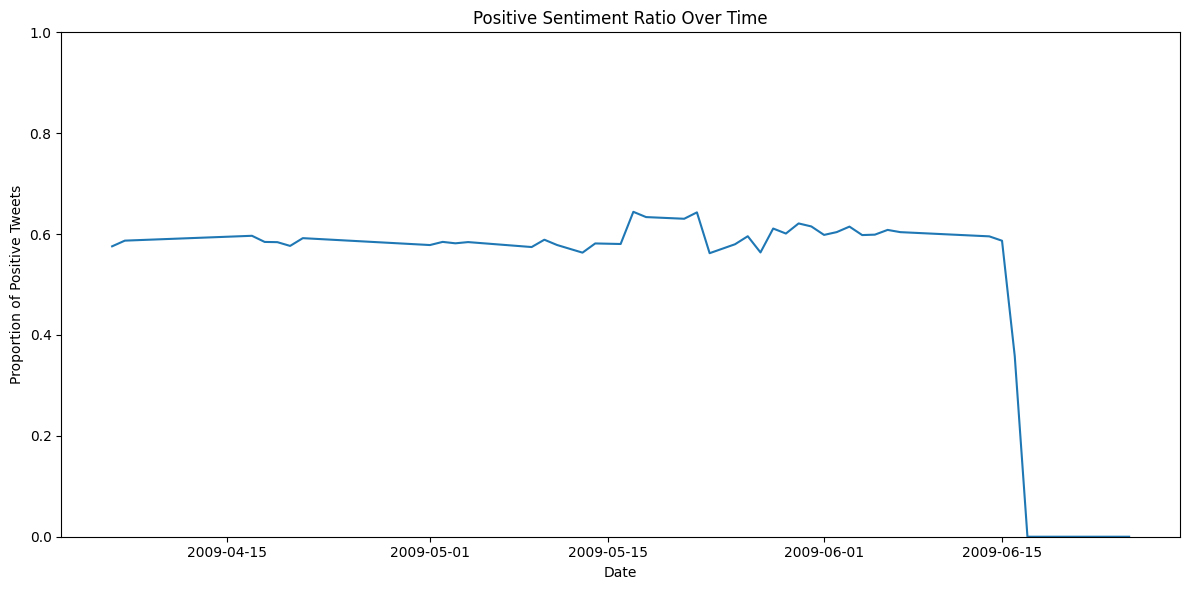

In [ ]:
# Analyze relationship between dates, users, and sentiment
def analyze_sentiment_over_time(df):
    print("\nSentiment Analysis Over Time:")
    print("-" * 50)

    # Group by date and sentiment
    sentiment_by_date = pd.pivot_table(
        df,
        index='date_only',
        columns='target',
        values='ids',
        aggfunc='count',
        fill_value=0
    )

    # Calculate sentiment ratio
    if 0 in sentiment_by_date.columns and 4 in sentiment_by_date.columns:
        sentiment_by_date['ratio_positive'] = sentiment_by_date[4] / (sentiment_by_date[0] + sentiment_by_date[4])

        # Plot sentiment ratio over time
        plt.figure(figsize=(12, 6))
        sentiment_by_date['ratio_positive'].plot(kind='line')
        plt.title('Positive Sentiment Ratio Over Time')
        plt.xlabel('Date')
        plt.ylabel('Proportion of Positive Tweets')
        plt.ylim(0, 1)
        plt.tight_layout()
        plt.savefig('sentiment_ratio_over_time.png')

        # Find dates with extreme sentiment ratios
        print("\nDates with highest positive sentiment ratio:")
        print(sentiment_by_date.sort_values('ratio_positive', ascending=False).head(10))

        print("\nDates with lowest positive sentiment ratio:")
        print(sentiment_by_date.sort_values('ratio_positive').head(10))

    return sentiment_by_date

analyze_sentiment_over_time(df)


IDs Analysis:
--------------------------------------------------
Min ID: 1467810672
Max ID: 2329205794
Average difference between consecutive IDs: 538.94
Min difference: 1
Max difference: 101576961
Number of duplicate IDs: 1685


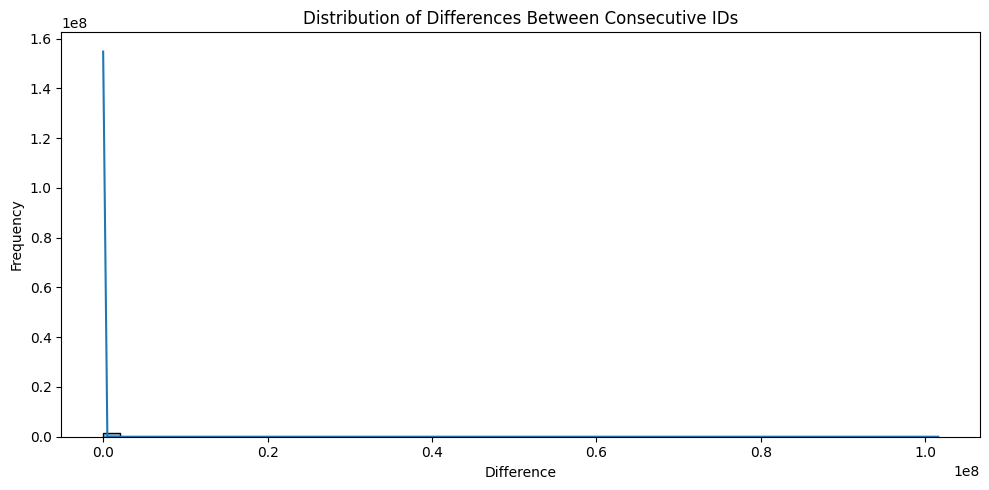

In [ ]:



# Optional: Analyze ids column for patterns
def analyze_ids(df):
    print("\nIDs Analysis:")
    print("-" * 50)

    # Basic statistics
    print(f"Min ID: {df['ids'].min()}")
    print(f"Max ID: {df['ids'].max()}")

    # Check if IDs are sequential
    sorted_ids = sorted(df['ids'].unique())
    id_diffs = np.diff(sorted_ids)

    print(f"Average difference between consecutive IDs: {id_diffs.mean():.2f}")
    print(f"Min difference: {id_diffs.min()}")
    print(f"Max difference: {id_diffs.max()}")

    # Check if there are any duplicate IDs
    duplicate_ids = df['ids'].duplicated().sum()
    print(f"Number of duplicate IDs: {duplicate_ids}")

    # Plot distribution of ID differences
    plt.figure(figsize=(10, 5))
    sns.histplot(id_diffs, bins=50, kde=True)
    plt.title('Distribution of Differences Between Consecutive IDs')
    plt.xlabel('Difference')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('id_differences_distribution.png')


analyze_ids(df)





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 14 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   target     1599999 non-null  int64         
 1   ids        1599999 non-null  int64         
 2   date       1599999 non-null  object        
 3   flag       1599999 non-null  object        
 4   user       1599999 non-null  object        
 5   text       1599999 non-null  object        
 6   datetime   1599999 non-null  datetime64[ns]
 7   date_only  1599999 non-null  object        
 8   year       1599999 non-null  int32         
 9   month      1599999 non-null  int32         
 10  day        1599999 non-null  int32         
 11  hour       1599999 non-null  int32         
 12  minute     1599999 non-null  int32         
 13  weekday    1599999 non-null  object        
dtypes: datetime64[ns](1), int32(5), int64(2), object(6)
memory usage: 140.4+ MB


El dataset contiene texto que se puede considerar como "sucio", es por ello que partamos de crear una función que pueda limpiar este texto eliminando URLs, menciones, emojis y caracteres especiales.
Recuerda que la limpieza de texto es crucial para que el análisis sea más preciso.

In [ ]:

def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    # Remove mentions (@username)
    text = re.sub(r"@\w+", "", text)

    # Remove emojis
    text = emoji.replace_emoji(text, replace="")  # Removes all emojis

    # Remove special characters and punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()

    return text


df['cleaned_text'] = df['text'].apply(clean_text)


## 2.3 Generación de características

### Se debe calcular la longitud del texto del tuit en su versión limpia (número de caracteres). Esta función es útil porque podría revelar patrones sobre la longitud y el contenido de los tuits.

In [ ]:
def tweet_length(text):
    """Returns the number of characters in a given text."""
    return len(text)
df['tweet_length'] = df['cleaned_text'].apply(tweet_length)


### Conteo de emojis: en algunos casos, los emojis pueden representar emociones, por lo que contamos cuántos emojis hay en el tuit. La función debe recorrer cada carácter del texto y contar cuántos emojis hay.

In [ ]:
def count_emojis(text):
    """Returns the number of emojis in a given text."""
    return sum(1 for char in text if char in emoji.EMOJI_DATA)
df['emoji_count'] = df['text'].apply(count_emojis)

### Conteo de los signos de exclamación e interrogación: los tweets con esta clase de signos podrían indicar entusiasmo o sorpresa.

In [ ]:
def count_punctuation(text):
    """Returns the number of exclamation and question marks in a given text."""
    exclamations = text.count("!")
    questions = text.count("?")
    return exclamations, questions

df["exclamation_count"], df["question_count"] = zip(*df["text"].apply(count_punctuation))


In [ ]:
df.head()

,target,ids,date,flag,user,text,datetime,date_only,year,month,day,hour,minute,weekday,cleaned_text,tweet_length,emoji_count,exclamation_count,question_count
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,2009-04-06,2009,4,6,22,19,Monday,is upset that he cant update his Facebook by t...,104,0,1,0
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,2009-04-06,2009,4,6,22,19,Monday,I dived many times for the ball Managed to sav...,76,0,0,0
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,2009-04-06,2009,4,6,22,19,Monday,my whole body feels itchy and like its on fire,46,0,0,0
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,2009-04-06,2009,4,6,22,19,Monday,no its not behaving at all im mad why am i her...,85,0,0,1
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,2009-04-06 22:20:00,2009-04-06,2009,4,6,22,20,Monday,not the whole crew,18,0,0,0


### Proporción de palabras mayúsculas

In [ ]:
def count_uppercase_words(text):
    """
    Calculate the proportion of uppercase words in text.

    Args:
        text (str): Input text

    Returns:
        float: Proportion of uppercase words (0 to 1)
    """
    try:
        # Handle non-string input
        if not isinstance(text, str):
            return 0.0

        # Split into words (handling multiple spaces and special characters)
        words = [word for word in text.split() if word.strip()]

        if not words:  # Handle empty text
            return 0.0

        # Count truly uppercase words (excluding single letters and numbers)
        uppercase_words = [
            word for word in words
            if word.isupper()
            and len(word) > 1  # Exclude single letters
            and not word.isdigit()  # Exclude numbers
            and any(c.isalpha() for c in word)  # Must contain at least one letter
        ]

        return len(uppercase_words) / len(words)

    except Exception as e:
      print(f"Error processing text: {e}")
      return 0.0
df['uppercase_proportion'] = df['text'].apply(count_uppercase_words)

### Conteo de palabras en cada tweet

In [ ]:
def get_word_counts(text):
    """
    Get detailed word count metrics for text.

    Args:
        text (str): Input text

    Returns:
        dict: Dictionary containing various word count metrics
    """
    try:
        # Handle non-string input
        if not isinstance(text, str):
            return {
                'total_words': 0,
                'unique_words': 0,
                'avg_word_length': 0,
                'long_words': 0  # words > 6 characters
            }

        # Split and clean words
        words = [
            word.strip(string.punctuation).lower()
            for word in text.split()
            if word.strip()
        ]

        # Remove empty strings after cleaning
        words = [word for word in words if word]

        if not words:
            return {
                'total_words': 0,
                'unique_words': 0,
                'avg_word_length': 0,
                'long_words': 0
            }

        return {
            'total_words': len(words),
            'unique_words': len(set(words)),
            'avg_word_length': sum(len(word) for word in words) / len(words),
            'long_words': sum(1 for word in words if len(word) > 6)
        }

    except Exception as e:
        print(f"Error processing text: {e}")
        return {
            'total_words': 0,
            'unique_words': 0,
            'avg_word_length': 0,
            'long_words': 0
        }
df['word_count'] = df['text'].apply(get_word_counts)

In [ ]:
df.head()

,target,ids,date,flag,user,text,datetime,date_only,year,month,...,hour,minute,weekday,cleaned_text,tweet_length,emoji_count,exclamation_count,question_count,uppercase_proportion,word_count
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,2009-04-06,2009,4,...,22,19,Monday,is upset that he cant update his Facebook by t...,104,0,1,0,0.0,"{'total_words': 21, 'unique_words': 21, 'avg_w..."
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,2009-04-06,2009,4,...,22,19,Monday,I dived many times for the ball Managed to sav...,76,0,0,0,0.0,"{'total_words': 18, 'unique_words': 17, 'avg_w..."
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,2009-04-06,2009,4,...,22,19,Monday,my whole body feels itchy and like its on fire,46,0,0,0,0.0,"{'total_words': 10, 'unique_words': 10, 'avg_w..."
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,2009-04-06,2009,4,...,22,19,Monday,no its not behaving at all im mad why am i her...,85,0,0,1,0.0,"{'total_words': 21, 'unique_words': 19, 'avg_w..."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,2009-04-06 22:20:00,2009-04-06,2009,4,...,22,20,Monday,not the whole crew,18,0,0,0,0.0,"{'total_words': 5, 'unique_words': 5, 'avg_wor..."


In [ ]:
# Download required NLTK resources
try:
    nltk.data.find('corpora/stopwords')
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("Downloading required NLTK resources...")
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)

# Initialize global resources
STOP_WORDS = set(stopwords.words('english'))
VADER_ANALYZER = SentimentIntensityAnalyzer()

In [ ]:
def count_stopwords(text):
    """Count stopwords in text."""
    if not isinstance(text, str):
        return 0
    words = text.lower().split()
    return sum(1 for word in words if word in STOP_WORDS)

def get_stopwords_ratio(text):
    """Calculate ratio of stopwords to total words."""
    if not isinstance(text, str):
        return 0.0
    words = text.lower().split()
    if not words:
        return 0.0
    stopwords_count = sum(1 for word in words if word in STOP_WORDS)
    return stopwords_count / len(words)

def count_repeated_words(text):
    """Count words that appear more than once."""
    if not isinstance(text, str):
        return 0
    words = text.lower().split()
    word_counts = Counter(words)
    return sum(1 for count in word_counts.values() if count > 1)

def get_repeated_words_ratio(text):
    """Calculate ratio of repeated words to unique words."""
    if not isinstance(text, str):
        return 0.0
    words = text.lower().split()
    if not words:
        return 0.0
    word_counts = Counter(words)
    repeated_words = sum(1 for count in word_counts.values() if count > 1)
    return repeated_words / len(set(words)) if set(words) else 0.0

def get_subjectivity(text):
    """Calculate text subjectivity using TextBlob."""
    if not isinstance(text, str):
        return 0.0
    return TextBlob(text).sentiment.subjectivity

def get_sentiment_scores(text):
    """Get sentiment scores using VADER."""
    if not isinstance(text, str):
        return 0.0
    return VADER_ANALYZER.polarity_scores(text)['compound']

def detect_sarcasm(text):
    """Detect potential sarcasm based on simple indicators."""
    if not isinstance(text, str):
        return 0.0

    # Get sentiment scores
    textblob_sentiment = TextBlob(text).sentiment.polarity
    vader_sentiment = VADER_ANALYZER.polarity_scores(text)['compound']

    # Sarcasm indicators
    indicators = [
        abs(textblob_sentiment - vader_sentiment) > 0.5,  # Sentiment mismatch
        '!' in text and '?' in text,  # Mixed punctuation
        '"' in text,  # Quotation marks
        "..." in text,  # Ellipsis
        any(word in text.lower() for word in ['great', 'wonderful', 'awesome'])
        and vader_sentiment < 0  # Positive words with negative sentiment
    ]

    return sum(indicators) / len(indicators)

def enrich_dataframe(df, text_column='text'):
    """
    Add text analysis features to DataFrame efficiently.

    Args:
        df (pandas.DataFrame): Input DataFrame
        text_column (str): Name of text column

    Returns:
        pandas.DataFrame: Enriched DataFrame
    """
    # Add basic metrics
    print("Processing stopwords...")
    df['stopwords_count'] = df[text_column].apply(count_stopwords)
    df['stopwords_ratio'] = df[text_column].apply(get_stopwords_ratio)

    print("Processing repeated words...")
    df['repeated_words_count'] = df[text_column].apply(count_repeated_words)
    df['repeated_words_ratio'] = df[text_column].apply(get_repeated_words_ratio)

    print("Processing sentiment and subjectivity...")
    df['subjectivity'] = df[text_column].apply(get_subjectivity)
    df['sentiment_score'] = df[text_column].apply(get_sentiment_scores)

    print("Processing sarcasm detection...")
    df['sarcasm_score'] = df[text_column].apply(detect_sarcasm)

    return df

In [ ]:
df = enrich_dataframe(df)
df.head()

Processing stopwords...
Processing repeated words...
Processing sentiment and subjectivity...
Processing sarcasm detection...


,target,ids,date,flag,user,text,datetime,date_only,year,month,...,question_count,uppercase_proportion,word_count,stopwords_count,stopwords_ratio,repeated_words_count,repeated_words_ratio,subjectivity,sentiment_score,sarcasm_score
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,2009-04-06,2009,4,...,0,0.0,"{'total_words': 21, 'unique_words': 21, 'avg_w...",8,0.380952,0,0.000000,0.0,-0.7500,0.4
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,2009-04-06,2009,4,...,0,0.0,"{'total_words': 18, 'unique_words': 17, 'avg_w...",7,0.388889,1,0.058824,0.5,0.4939,0.0
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,2009-04-06,2009,4,...,0,0.0,"{'total_words': 10, 'unique_words': 10, 'avg_w...",4,0.400000,0,0.000000,0.4,-0.2500,0.0
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,2009-04-06,2009,4,...,1,0.0,"{'total_words': 21, 'unique_words': 19, 'avg_w...",12,0.571429,1,0.050000,1.0,-0.4939,0.0
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,2009-04-06 22:20:00,2009-04-06,2009,4,...,0,0.0,"{'total_words': 5, 'unique_words': 5, 'avg_wor...",2,0.400000,0,0.000000,0.4,0.0000,0.0


# **3. División de los datos**

In [ ]:


# 3. Drop all non-numeric columns that aren't useful for prediction
columns_to_drop = ['ids', 'word_count', 'date', 'flag', 'user', 'text', 'datetime', 'date_only', 'year', 'month']
df = df.drop(columns_to_drop, axis=1, errors='ignore')  # errors='ignore' in case some columns don't exist

# 4. Check if there are any remaining object columns
object_columns = df.select_dtypes(include=['object']).columns
if not object_columns.empty:
    print(f"Remaining object columns: {list(object_columns)}")
    # You might need to handle these additional columns

# 5. Double-check the datatypes after cleaning
print(df.dtypes)

# 6. Make sure to apply the same transformations to X_test
# X_test['word_count_numeric'] = X_test['word_count'].apply(lambda x: x['total_words'] if isinstance(x, dict) and 'total_words' in x else 0)
# X_test = X_test.drop('word_count', axis=1)
# X_test = X_test.drop(columns_to_drop, axis=1, errors='ignore')

Remaining object columns: ['weekday', 'cleaned_text']
target                    int64
day                       int32
hour                      int32
minute                    int32
weekday                  object
cleaned_text             object
tweet_length              int64
emoji_count               int64
exclamation_count         int64
question_count            int64
uppercase_proportion    float64
stopwords_count           int64
stopwords_ratio         float64
repeated_words_count      int64
repeated_words_ratio    float64
subjectivity            float64
sentiment_score         float64
sarcasm_score           float64
dtype: object


In [ ]:
df.columns

Index(['target', 'day', 'hour', 'minute', 'weekday', 'cleaned_text',
       'tweet_length', 'emoji_count', 'exclamation_count', 'question_count',
       'uppercase_proportion', 'stopwords_count', 'stopwords_ratio',
       'repeated_words_count', 'repeated_words_ratio', 'subjectivity',
       'sentiment_score', 'sarcasm_score'],
      dtype='object')

In [ ]:
X = df.drop(columns=[ 'target', 'cleaned_text', 'minute', 'weekday'])
y = df['target']

In [ ]:
X.columns

Index(['day', 'hour', 'tweet_length', 'emoji_count', 'exclamation_count',
       'question_count', 'uppercase_proportion', 'stopwords_count',
       'stopwords_ratio', 'repeated_words_count', 'repeated_words_ratio',
       'subjectivity', 'sentiment_score', 'sarcasm_score'],
      dtype='object')

In [ ]:
# Verificar las dimensiones de las variables
print(f"Dimensión de X (variables predictoras): {X.shape}")
print(f"Dimensión de y (variable objetivo): {y.shape}")

Dimensión de X (variables predictoras): (1599999, 14)
Dimensión de y (variable objetivo): (1599999,)


In [ ]:

# Primero, dividir en train (70%) y test (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# Ahora dividir X_temp en test (50%) y validation (50%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verificar las dimensiones después del split
print(f"Conjunto de entrenamiento (train): {X_train.shape}, {y_train.shape}")
print(f"Conjunto de prueba (test): {X_test.shape}, {y_test.shape}")
print(f"Conjunto de validación (validation): {X_val.shape}, {y_val.shape}")

Conjunto de entrenamiento (train): (1119999, 14), (1119999,)
Conjunto de prueba (test): (240000, 14), (240000,)
Conjunto de validación (validation): (240000, 14), (240000,)


# **4. Análisis exploratorio**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

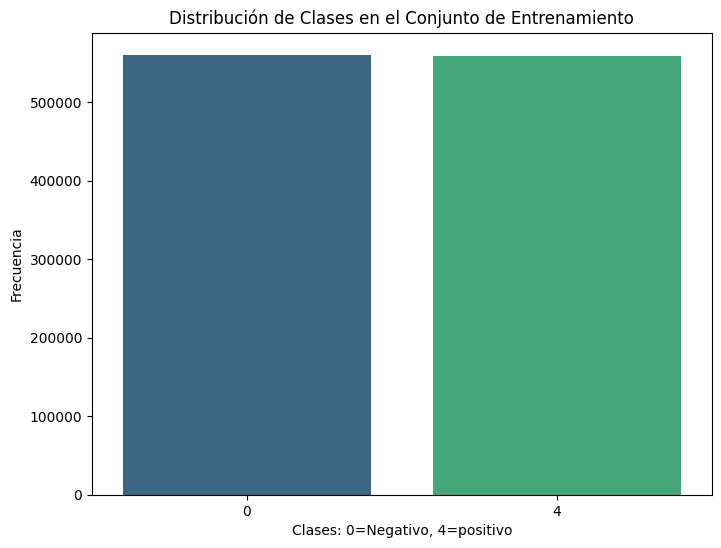

In [ ]:
# Barplot de distribución de clases de datos de entrenamiento
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribución de Clases en el Conjunto de Entrenamiento')
plt.xlabel('Clases: 0=Negativo, 4=positivo')
plt.ylabel('Frecuencia')
plt

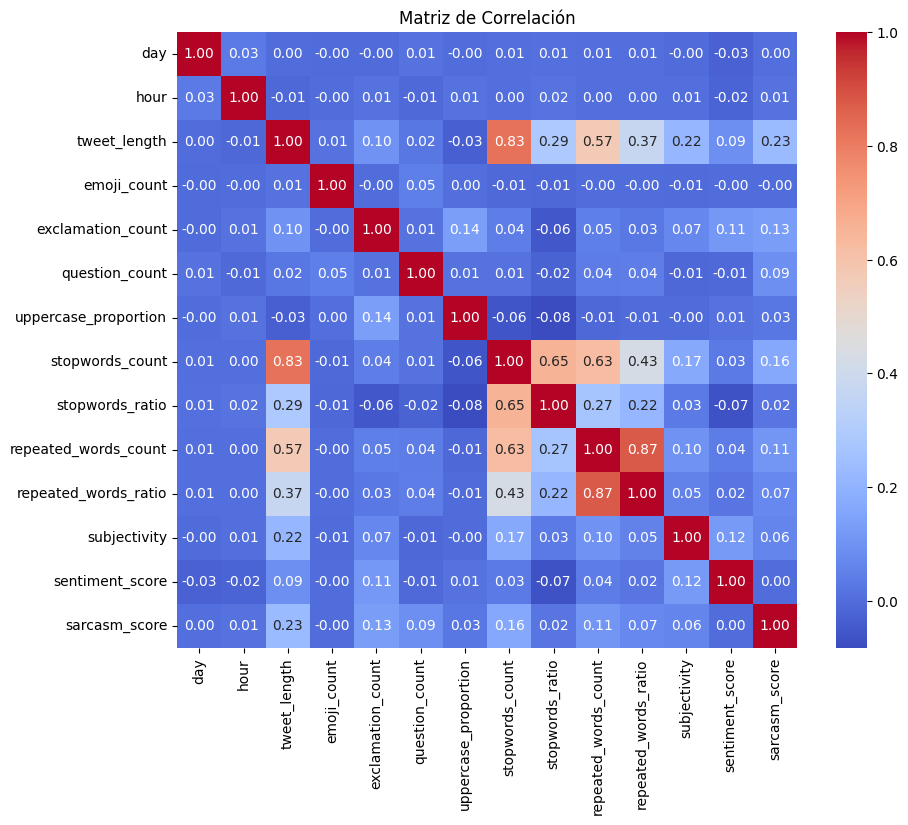

In [ ]:
#Matrix de correlación
df_numeric = X_train.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


# **5.Modelado**

## Modelo XGBOOST

In [ ]:
y_train.replace({4: 1}, inplace=True)
y_test.replace({4: 1}, inplace=True)
y_val.replace({4: 1}, inplace=True)

In [ ]:
from sklearn.experimental import enable_halving_search_cv  # Import necesario para Halving
from sklearn.model_selection import HalvingGridSearchCV
import xgboost as xgb

xgb_model = xgb.XGBClassifier(eval_metric='auc')

# Espacio de parámetros para optimizar
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}
# Modelo base
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', random_state=42)

# Búsqueda aleatoria con validación cruzada
halving_search = HalvingGridSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Número de combinaciones a probar
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
halving_search.fit(X_train, y_train)


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 4
min_resources_: 10000
max_resources_: 100000
aggressive_elimination: True
factor: 2
----------
iter: 0
n_candidates: 4
n_resources: 20000
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 40000
Fitting 3 folds for each of 2 candidates, totalling 6 fits
----------
iter: 2
n_candidates: 1
n_resources: 80000
Fitting 3 folds for each of 1 candidates, totalling 3 fits


HalvingGridSearchCV(aggressive_elimination=True, cv=3,
                    estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='auc',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_...
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...),
                    factor=2, max_resources=100000, min_resources=10000,
                    n_jobs=-1,
                    param_grid={'colsample_bytree': [0.8], 'gamma': [0],
                                'learning_rate': [0.01, 0.1],
                                'max_depth': [3, 7], 'min_child_weight': [1],
                                'n_estimators': [200], 'subsample': [0.8]},
                    random_state=42, scoring='roc_auc', verbose=2)

In [ ]:
# Ver los mejores hiperparámetros
best_params = halving_search.best_params_
best_score = halving_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation model: {best_score:.4f}")

#


Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation model: 0.8239


Umbral óptimo (método Youden): 0.5045
Sensibilidad en umbral óptimo: 0.8066
Especificidad en umbral óptimo: 0.6857
Umbral óptimo (método de distancia): 0.5299


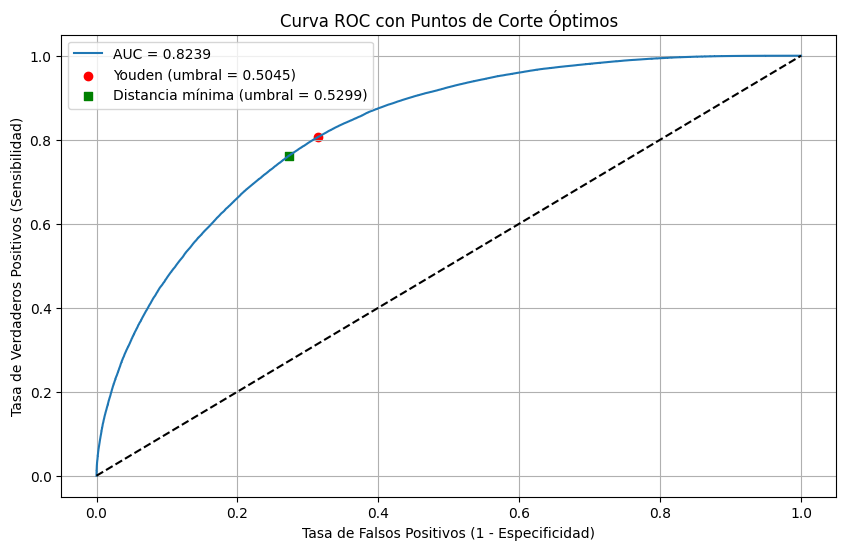

In [ ]:


# Obtén el mejor modelo de tu búsqueda

best_xbg = halving_search.best_estimator_

# Obtén las probabilidades predichas para la clase positiva
y_pred_proba = best_xbg.predict_proba(X_test)[:, 1]

# Método 1: Maximizando el índice de Youden (sensibilidad + especificidad - 1)
# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcula el índice de Youden para cada umbral
youden_index = tpr - fpr

# Encuentra el umbral que maximiza el índice de Youden
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print(f"Umbral óptimo (método Youden): {optimal_threshold:.4f}")
print(f"Sensibilidad en umbral óptimo: {tpr[optimal_idx]:.4f}")
print(f"Especificidad en umbral óptimo: {1-fpr[optimal_idx]:.4f}")

# Método 2: Distancia mínima al punto ideal (0,1) en la curva ROC
# Calcula la distancia euclidiana al punto (0,1)
distances = np.sqrt((1-tpr)**2 + fpr**2)
optimal_idx_dist = np.argmin(distances)
optimal_threshold_dist = thresholds[optimal_idx_dist]

print(f"Umbral óptimo (método de distancia): {optimal_threshold_dist:.4f}")

# Visualiza la curva ROC y el punto óptimo
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {halving_search.best_score_:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',
            label=f'Youden (umbral = {optimal_threshold:.4f})')
plt.scatter(fpr[optimal_idx_dist], tpr[optimal_idx_dist], marker='s', color='green',
            label=f'Distancia mínima (umbral = {optimal_threshold_dist:.4f})')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC con Puntos de Corte Óptimos')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Método 3: Punto de equilibrio entre precisión y recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
# Añadir un valor a thresholds_pr para que tenga la misma longitud que precision y recall
thresholds_pr = np.append(thresholds_pr, 1.0)

# Encuentra el punto donde precisión y recall son más cercanos
diff = abs(precision - recall)
optimal_idx_pr = np.argmin(diff)
optimal_threshold_pr = thresholds_pr[optimal_idx_pr]

print(f"Umbral óptimo (equilibrio precisión-recall): {optimal_threshold_pr:.4f}")
print(f"Precisión en este umbral: {precision[optimal_idx_pr]:.4f}")
print(f"Recall en este umbral: {recall[optimal_idx_pr]:.4f}")

Umbral óptimo (equilibrio precisión-recall): 0.5394
Precisión en este umbral: 0.7436
Recall en este umbral: 0.7436


In [ ]:
# Paso 1: Entrenar el modelo XGBoost con los mejores parámetros
best_xgb = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=1,
    gamma=0,
    eval_metric='auc',
    random_state=42
)

# Entrenar el modelo con todos los datos de entrenamiento
best_xgb.fit(X_train, y_train)

# Paso 2: Obtener probabilidades en el conjunto de prueba
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Paso 3: Para un enfoque equilibrado general: el método de distancia mínima es una buena opción
threshold = 0.5299  # Cambia esto según el umbral que elijas
y_pred_custom = (y_pred_proba >= threshold).astype(int)

# Paso 4: Evaluar el rendimiento con este umbral
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

print("Matriz de confusión con umbral personalizado:")
print(confusion_matrix(y_test, y_pred_custom))
print("\nReporte de clasificación con umbral personalizado:")
print(classification_report(y_test, y_pred_custom))
print(f"Accuracy con umbral personalizado: {accuracy_score(y_test, y_pred_custom):.4f}")

Matriz de confusión con umbral personalizado:
[[85896 33558]
 [27788 92758]]

Reporte de clasificación con umbral personalizado:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74    119454
           1       0.73      0.77      0.75    120546

    accuracy                           0.74    240000
   macro avg       0.74      0.74      0.74    240000
weighted avg       0.74      0.74      0.74    240000

Accuracy con umbral personalizado: 0.7444


In [ ]:
# Calcula AUC para XGBoost
auc_xgb = roc_auc_score(y_test, y_pred_custom)
# Convierte AUC a Gini
gini_xgb = 2 * auc_xgb - 1

print(f"AUC-ROC para XGBoost: {auc_xgb:.4f}")
print(f"Coeficiente Gini para XGBoost: {gini_xgb:.4f}")

AUC-ROC para XGBoost: 0.7443
Coeficiente Gini para XGBoost: 0.4886


In [ ]:
# Predecir los valores en el conjunto de test
y_pred = best_model.predict(X_test)
# Crear un DataFrame para mostrar las importancias con sus respectivas variables
feature_importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': best_model.feature_importances_
})

# Ordenar las variables por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Mostrar las 10 variables más importantes
print(feature_importance_df[:9])

                Variable  Importancia
12       sentiment_score     0.370760
0                    day     0.351213
1                   hour     0.087057
7        stopwords_count     0.052523
4      exclamation_count     0.029714
13         sarcasm_score     0.024422
8        stopwords_ratio     0.021237
9   repeated_words_count     0.018518
2           tweet_length     0.017629


Text(70.72222222222221, 0.5, 'Valores reales')

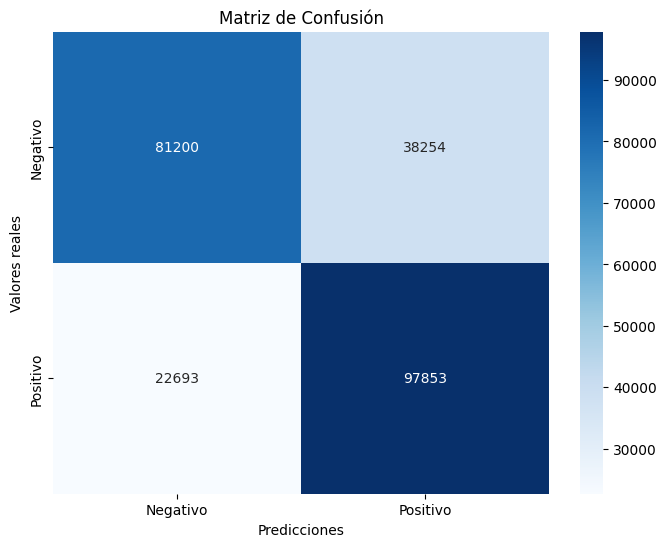

In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')


## Modelo LightGBM

In [ ]:
# Obtén el mejor modelo de tu búsqueda
best_lgbm = halving_search.best_estimator_
best_params = halving_search.best_params_
best_score = halving_search.best_score_

print(f"Mejores parámetros para LightGBM: {best_params}")
print(f"Mejor puntuación de validación cruzada (AUC): {best_score:.4f}")

Mejores parámetros para LightGBM: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Mejor puntuación de validación cruzada (AUC): 0.8239


In [ ]:
import lightgbm as lgb
# Entrena el modelo con los mejores parámetros encontrados en todos los datos de entrenamiento
best_lgbm = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_child_weight=1,
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=42,
    n_jobs=-1
)

best_lgbm.fit(X_train, y_train)

# Obtén las probabilidades predichas para la clase positiva
y_pred_proba = best_lgbm.predict_proba(X_test)[:, 1]

# Calcula el AUC-ROC y Gini
auc_lgbm = roc_auc_score(y_test, y_pred_proba)
gini_lgbm = 2 * auc_lgbm - 1

print(f"AUC-ROC para LightGBM: {auc_lgbm:.4f}")
print(f"Coeficiente Gini para LightGBM: {gini_lgbm:.4f}")

[LightGBM] [Info] Number of positive: 559361, number of negative: 560638
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.477299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1276
[LightGBM] [Info] Number of data points in the train set: 1119999, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499430 -> initscore=-0.002280
[LightGBM] [Info] Start training from score -0.002280
AUC-ROC para LightGBM: 0.8222
Coeficiente Gini para LightGBM: 0.6443


Umbral óptimo (método Youden): 0.5209
Sensibilidad en umbral óptimo: 0.8024
Especificidad en umbral óptimo: 0.6870
Umbral óptimo (método de distancia): 0.5400
Umbral óptimo (equilibrio precisión-recall): 0.5495
Precisión en este umbral: 0.7416
Recall en este umbral: 0.7416


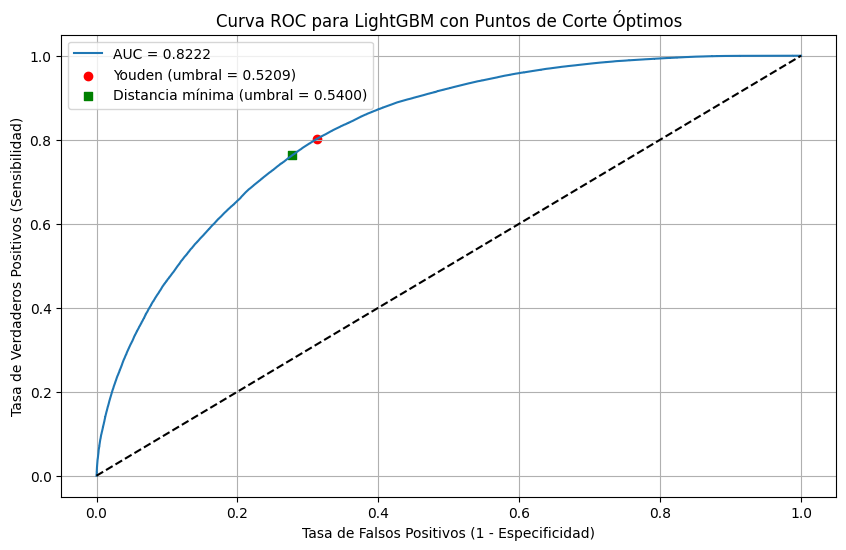

In [ ]:
# 1. Método Youden: Maximizando sensibilidad + especificidad - 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
youden_index = tpr - fpr
optimal_idx_youden = np.argmax(youden_index)
optimal_threshold_youden = thresholds[optimal_idx_youden]

print(f"Umbral óptimo (método Youden): {optimal_threshold_youden:.4f}")
print(f"Sensibilidad en umbral óptimo: {tpr[optimal_idx_youden]:.4f}")
print(f"Especificidad en umbral óptimo: {1-fpr[optimal_idx_youden]:.4f}")

# 2. Método de distancia mínima al punto ideal (0,1)
distances = np.sqrt((1-tpr)**2 + fpr**2)
optimal_idx_dist = np.argmin(distances)
optimal_threshold_dist = thresholds[optimal_idx_dist]

print(f"Umbral óptimo (método de distancia): {optimal_threshold_dist:.4f}")

# 3. Método de equilibrio entre precisión y recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
# Añadir un valor a thresholds_pr para igualar longitudes
thresholds_pr = np.append(thresholds_pr, 1.0)

diff_pr = abs(precision - recall)
optimal_idx_pr = np.argmin(diff_pr)
optimal_threshold_pr = thresholds_pr[optimal_idx_pr]

print(f"Umbral óptimo (equilibrio precisión-recall): {optimal_threshold_pr:.4f}")
print(f"Precisión en este umbral: {precision[optimal_idx_pr]:.4f}")
print(f"Recall en este umbral: {recall[optimal_idx_pr]:.4f}")

# Visualiza la curva ROC y los puntos óptimos
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_lgbm:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr[optimal_idx_youden], tpr[optimal_idx_youden], marker='o', color='red',
            label=f'Youden (umbral = {optimal_threshold_youden:.4f})')
plt.scatter(fpr[optimal_idx_dist], tpr[optimal_idx_dist], marker='s', color='green',
            label=f'Distancia mínima (umbral = {optimal_threshold_dist:.4f})')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC para LightGBM con Puntos de Corte Óptimos')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Usando el umbral de distancia mínima
y_pred_dist = (y_pred_proba >= optimal_threshold_dist).astype(int)

print("\n=== Evaluación con umbral de distancia mínima ===")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_dist))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_dist))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dist):.4f}")



=== Evaluación con umbral de distancia mínima ===
Matriz de confusión:
[[86226 33228]
 [28486 92060]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      0.72      0.74    119454
           1       0.73      0.76      0.75    120546

    accuracy                           0.74    240000
   macro avg       0.74      0.74      0.74    240000
weighted avg       0.74      0.74      0.74    240000

Accuracy: 0.7429


In [117]:
# Guarda el modelo LightGBM
joblib.dump(best_lgbm, 'lgbm_model.joblib')

# Guarda los umbrales junto con el modelo
threshold_info = {
    'youden_threshold': optimal_threshold_youden,
    'distance_threshold': optimal_threshold_dist,
    'pr_threshold': optimal_threshold_pr,
    # Puedes establecer aquí cuál es tu umbral preferido
    'selected_threshold': optimal_threshold_youden  # Cambia esto según tu preferencia
}

joblib.dump(threshold_info, 'lgbm_threshold_info.joblib')

['lgbm_threshold_info.joblib']

In [ ]:
# Predecir los valores en el conjunto de test
y_pred = best_model.predict(X_test)
# Crear un DataFrame para mostrar las importancias con sus respectivas variables
feature_importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': best_model.feature_importances_
})

# Ordenar las variables por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Mostrar las 10 variables más importantes
print(feature_importance_df[:9])

                Variable  Importancia
12       sentiment_score     0.370760
0                    day     0.351213
1                   hour     0.087057
7        stopwords_count     0.052523
4      exclamation_count     0.029714
13         sarcasm_score     0.024422
8        stopwords_ratio     0.021237
9   repeated_words_count     0.018518
2           tweet_length     0.017629


Text(70.72222222222221, 0.5, 'Valores reales')

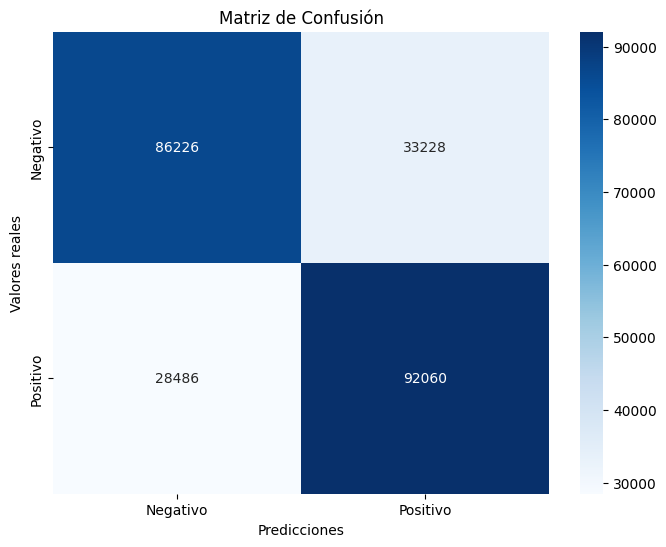

In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_dist)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')


# **6.Evaluación de los Modelos**


## Comparación entre XGBoost y LightGBM

| Métrica | XGBoost | LightGBM |
|--------|---------|----------|
| Matriz de confusión | [[85896 33558]<br>[27788 92758]] | [[86226 33228]<br>[28486 92060]] |
| Precisión (clase 0) | 0,76 | 0,75 |
| Recordatorio (clase 0) | 0,72 | 0,72 |
| Puntuación F1 (clase 0) | 0,74 | 0,74 |
| Precisión (clase 1) | 0,73 | 0,73 |
| Recordatorio (clase 1) | 0,77 | 0,76 |
| Puntuación F1 (clase 1) | 0,75 | 0,75 |
| Precisión | 0,7444 | 0,7429 |
| AUC-ROC | 0,7443 | 0,8222 |
| Coeficiente de Gini | 0,4886 | 0,6443 |

## Análisis de selección de modelos

Según las métricas proporcionadas, **LightGBM** sería el mejor modelo para implementar por las siguientes razones:

1. **Puntaje AUC-ROC superior**: LightGBM logra un AUC-ROC de 0,8222 en comparación con el 0,7443 de XGBoost. Esta es una mejora sustancial (aproximadamente un 10,5 % más) e indica que LightGBM tiene una capacidad de discriminación significativamente mejor entre las clases en varios umbrales.

2. **Coeficiente de Gini más alto**: el coeficiente de Gini de LightGBM (0,6443) es mucho mejor que el de XGBoost (0,4886). El coeficiente de Gini, derivado del AUC-ROC (Gini = 2*AUC-1), confirma la capacidad de clasificación superior de LightGBM.

3. **Métricas de clasificación similares**: ambos modelos funcionan de manera casi idéntica en precisión, recuperación, puntuación F1 y exactitud (aproximadamente 0,74), y XGBoost tiene una ventaja insignificante en precisión (0,7444 frente a 0,7429).

4. **Análisis de la matriz de confusión**:
- XGBoost tiene un poco menos de falsos negativos (27.788 frente a 28.486)
- LightGBM tiene un poco menos de falsos positivos (33.228 frente a 33.558)
- Las diferencias en las matrices de confusión son mínimas y no compensan la importante ventaja de AUC-ROC

Si bien XGBoost tiene una ventaja marginal en precisión (0,0015 más), esta pequeña diferencia se ve eclipsada por la capacidad sustancialmente mejor de LightGBM para clasificar las predicciones correctamente, como lo demuestran las métricas AUC-ROC y Gini.

El AUC-ROC es particularmente importante si:
- El umbral de clasificación óptimo puede cambiar en el futuro
- Los costos de los falsos positivos y los falsos negativos son diferentes o pueden cambiar
- Necesita estimaciones de probabilidad en lugar de solo predicciones binarias

Además, LightGBM es generalmente conocido por sus velocidades de entrenamiento más rápidas y su menor uso de memoria en comparación con XGBoost, lo que podría ser ventajoso en entornos de producción, aunque esto no se midió directamente en las métricas proporcionadas.

Por lo tanto, LightGBM sería el modelo recomendado para implementar en función de estas métricas de evaluación.

# **7.Implementación del modelo y prueba**

In [118]:
import re
import numpy as np
import pandas as pd
import pickle
import lightgbm as lgb
from textblob import TextBlob
from datetime import datetime
import emoji

# Load trained LightGBM model
with open("lgbm_model.joblib", "rb") as f:
    trained_model = joblib.load(f)

# Define feature extraction function
def extract_features(texts):
    feature_list = []

    for text in texts:
        # Extract timestamp-related features
        now = datetime.now()
        day = now.weekday()  # 0 = Monday, 6 = Sunday
        hour = now.hour

        # Text-based features
        tweet_length = len(text)
        emoji_count = sum(1 for char in text if char in emoji.EMOJI_DATA)
        exclamation_count = text.count("!")
        question_count = text.count("?")
        uppercase_proportion = sum(1 for char in text if char.isupper()) / max(1, tweet_length)

        # Stopword-related features
        stopwords = set(["the", "a", "an", "in", "on", "at", "is", "to", "for", "and", "or"])  # Extend list as needed
        words = text.lower().split()
        stopwords_count = sum(1 for word in words if word in stopwords)
        stopwords_ratio = stopwords_count / max(1, len(words))

        # Repeated word features
        unique_words = set(words)
        repeated_words_count = len(words) - len(unique_words)
        repeated_words_ratio = repeated_words_count / max(1, len(words))

        # Sentiment and subjectivity scores
        sentiment_score = TextBlob(text).sentiment.polarity  # Ranges from -1 to 1
        subjectivity = TextBlob(text).sentiment.subjectivity  # Ranges from 0 to 1

        # Sarcasm score (Placeholder: Adjust based on sarcasm detection method)
        sarcasm_score = 0  # If you have sarcasm detection, replace this with actual value

        # Append all extracted features as a row
        feature_list.append([
            day, hour, tweet_length, emoji_count, exclamation_count, question_count,
            uppercase_proportion, stopwords_count, stopwords_ratio, repeated_words_count,
            repeated_words_ratio, subjectivity, sentiment_score, sarcasm_score
        ])

    return pd.DataFrame(feature_list, columns=[
        'day', 'hour', 'tweet_length', 'emoji_count', 'exclamation_count',
        'question_count', 'uppercase_proportion', 'stopwords_count',
        'stopwords_ratio', 'repeated_words_count', 'repeated_words_ratio',
        'subjectivity', 'sentiment_score', 'sarcasm_score'
    ])

# Example tweets to predict
texts = [
    "Bootcamp experience was bored! @alejandro @abel",
    "Had an amazing time at the concert!"
]

# Extract features for new texts
X_new = extract_features(texts)

# Predict using the trained model
predictions = trained_model.predict(X_new)

# Map numerical predictions to sentiment labels
sentiment_mapping = {0: "Negative", 1: "Positive"}
predicted_labels = [sentiment_mapping[pred] for pred in predictions]

# Print results
for text, sentiment in zip(texts, predicted_labels):
    print(f"Text: {text} -> Sentiment: {sentiment}")


Text: Bootcamp experience was bored! @alejandro @abel -> Sentiment: Negative
Text: Had an amazing time at the concert! -> Sentiment: Positive
